<a href="https://colab.research.google.com/github/zizizw/Business-Analytics-Projects/blob/main/Customer%20Campaign%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import seaborn as sns
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import colors
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

# Import Data & Preprocessing

In [ ]:
#import dataset
data_df = pd.read_csv('group_project1_marketing_campaign.csv')
df = data_df.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012/9/4,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014/3/8,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013/8/21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014/2/10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014/1/19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013/6/13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014/6/10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014/1/25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014/1/24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#data processing - null data
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Feature Engineering

In [ ]:
#df['children']=df['Teenhome']+df['Kidhome']
df['age']=2014-df['Year_Birth']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y/%m/%d')
specific_date = pd.Timestamp('2014/12/31')
df['Days_Since_Enrollment'] = (specific_date - df['Dt_Customer']).dt.days
print(df[['Dt_Customer', 'Days_Since_Enrollment']])

     Dt_Customer  Days_Since_Enrollment
0     2012-09-04                    848
1     2014-03-08                    298
2     2013-08-21                    497
3     2014-02-10                    324
4     2014-01-19                    346
...          ...                    ...
2235  2013-06-13                    566
2236  2014-06-10                    204
2237  2014-01-25                    340
2238  2014-01-24                    341
2239  2012-10-15                    807

[2216 rows x 2 columns]


Drop Outliers

In [ ]:
df.drop(df.loc[df['Marital_Status']=='Absurd'].index, inplace = True)
df.drop(df.loc[df['Marital_Status']=='Alone'].index, inplace = True)
df.drop(df.loc[df['Marital_Status']=='YOLO'].index, inplace = True)
df.drop(df.loc[df["Income"] >= 600000].index, inplace = True)
df.drop(df.loc[df["age"] >= 100].index, inplace = True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Days_Since_Enrollment
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.000000,2205.000000,2205.000000
mean,5588.418594,1968.898866,51954.615420,0.441723,0.505669,2013-07-10 07:26:41.632653056,49.082993,305.390930,26.328345,167.195465,...,0.074376,0.072562,0.063946,0.013605,0.009070,3.0,11.0,0.149660,45.101134,538.689796
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,185.000000
25%,2826.000000,1959.000000,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,365.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,541.000000
75%,8420.000000,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,233.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,714.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,74.000000,884.000000
std,3244.026348,11.695828,21544.431675,0.537083,0.544390,NaN,28.942914,337.684201,39.750140,224.407992,...,0.262442,0.259476,0.244711,0.115872,0.094827,0.0,0.0,0.356819,11.695828,202.343578


Change the categorical features Marriage Status and Education into numerical values.

In [ ]:
#turn categorical data to dummies
categorical_features = ["Education", "Marital_Status"]
categorical_df = df[categorical_features]
dummy_df = pd.get_dummies(categorical_df,drop_first = True)
concat_df = pd.concat([df, dummy_df],axis = 1)
concat_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Days_Since_Enrollment', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [ ]:
concat_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,age,Days_Since_Enrollment,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,57,848,False,True,False,False,False,True,False,False
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,60,298,False,True,False,False,False,True,False,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,49,497,False,True,False,False,False,False,True,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,30,324,False,True,False,False,False,False,True,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,33,346,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,47,566,False,True,False,False,True,False,False,False
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,68,204,False,False,False,True,False,False,True,False
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,33,340,False,True,False,False,False,False,False,False
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,58,341,False,False,True,False,False,False,True,False


In [ ]:
concat_df2 = concat_df.copy()
concat_df2.drop(columns=['Year_Birth','Education', 'Marital_Status','Z_CostContact', 'Z_Revenue','Dt_Customer'], inplace=True)

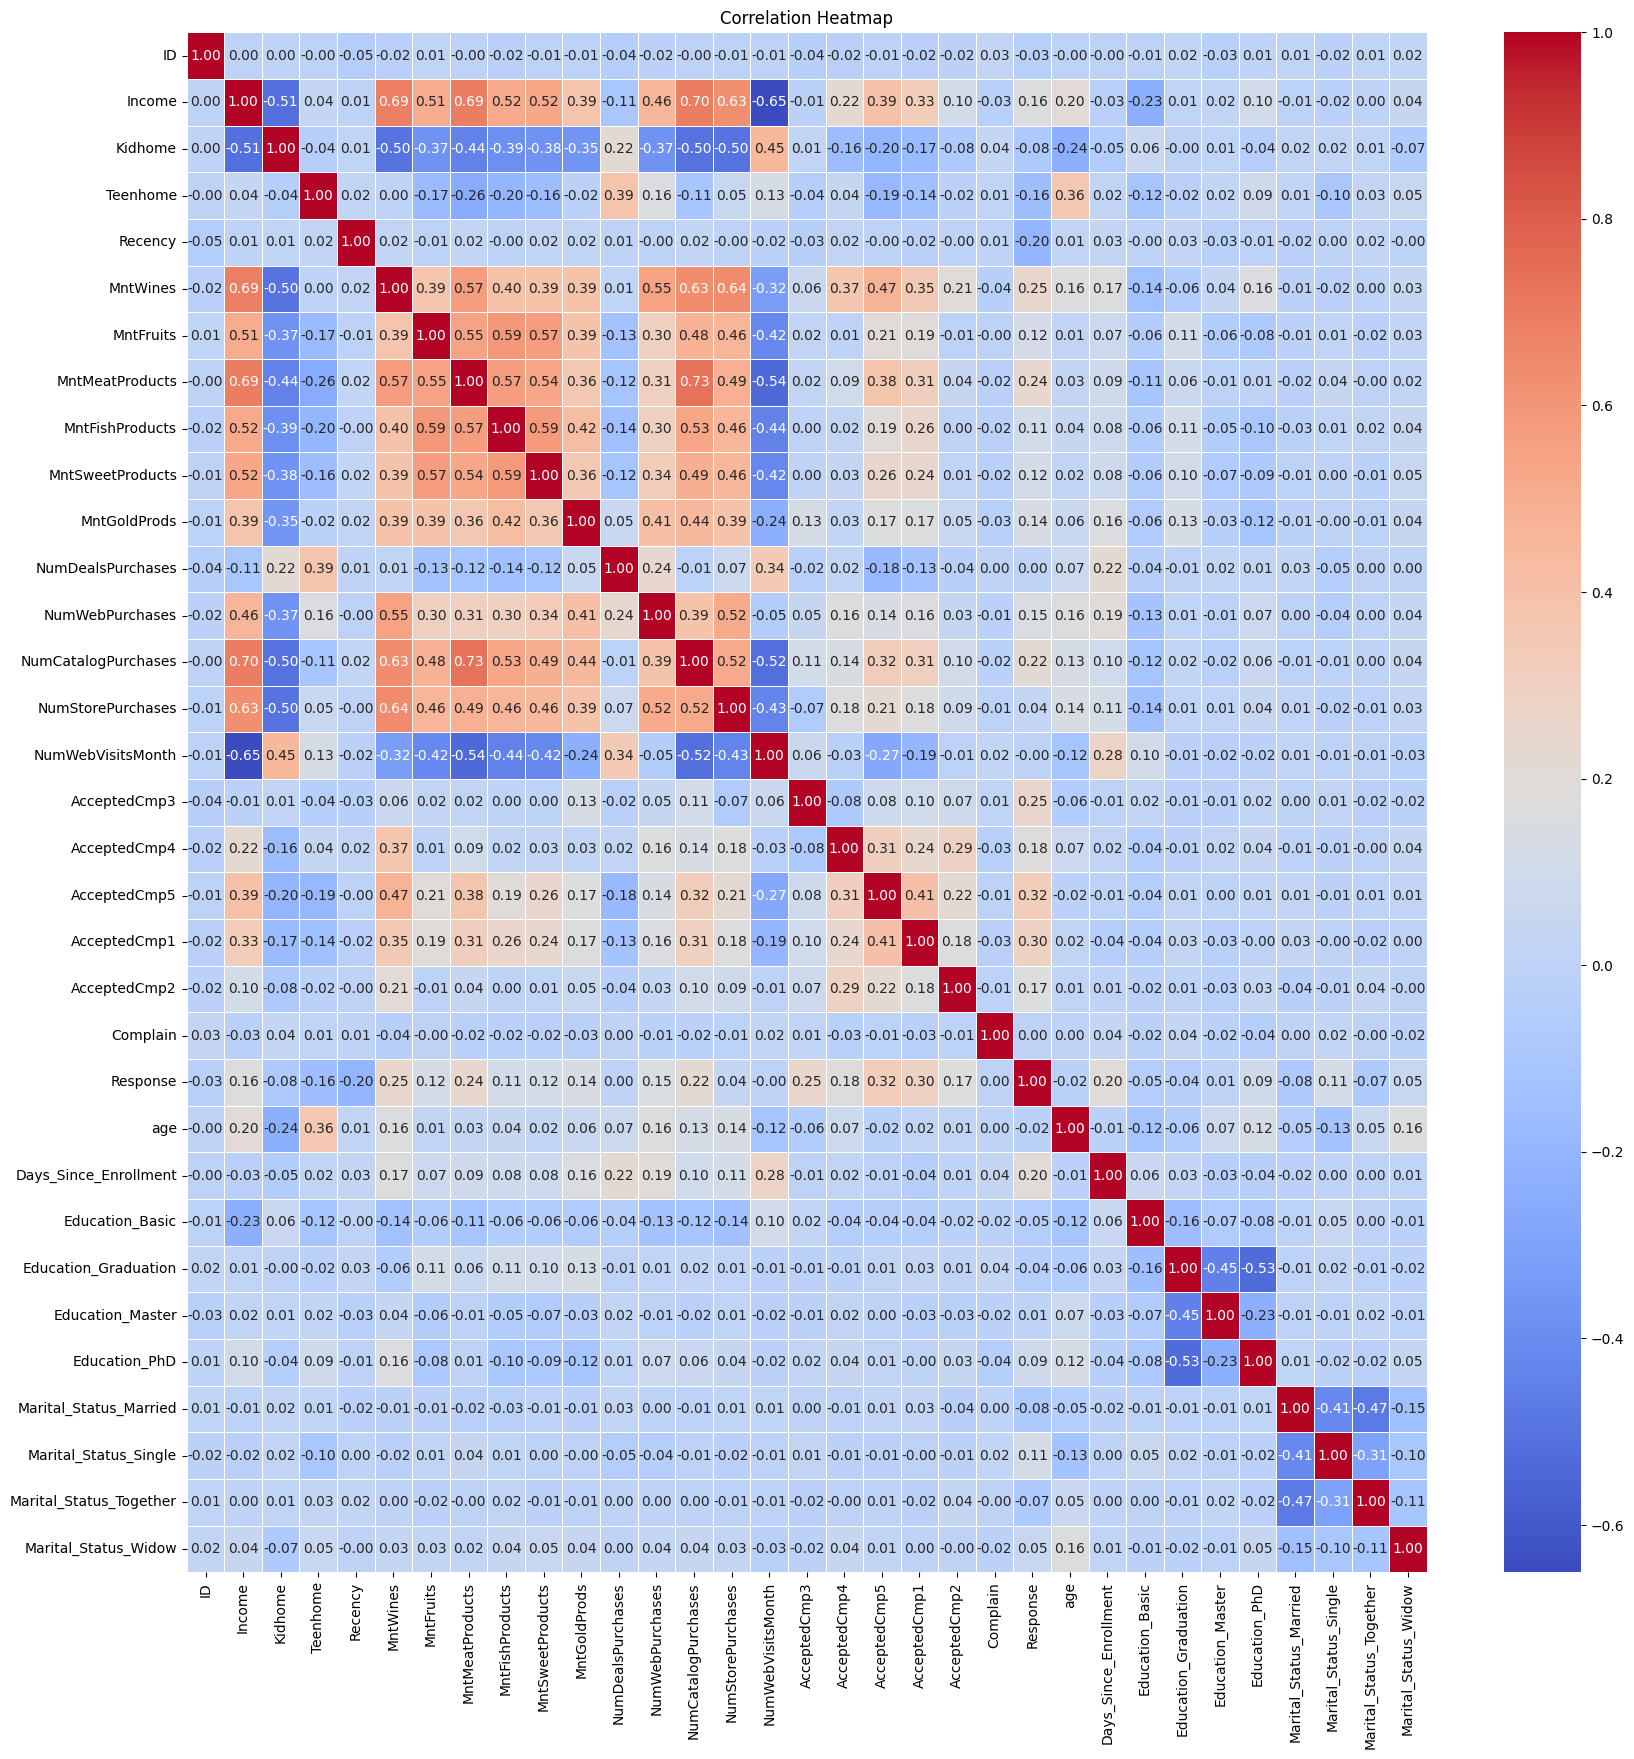

In [ ]:
correlation_matrix = concat_df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
concat_df2.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'Days_Since_Enrollment',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

# Object 1: Current Customer Clustering

In [ ]:
selected_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain',  'age', 'Days_Since_Enrollment',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow']
data_selected = concat_df[selected_features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)
pca = PCA(n_components=16)
principal_components = pca.fit_transform(data_scaled)

for n in range(2, 32):
  pca = PCA(n_components=n)
  pca_result = pca.fit_transform(data_scaled)
  explained_variance = pca.explained_variance_ratio_
  cumulative_variance = explained_variance.cumsum()
  print(n, ":", cumulative_variance)

pca_df = pd.DataFrame(data=principal_components,
                      columns=['PC{}'.format(i) for i in range(1, 17)])
pca_df

2 : [0.21612766 0.2879694 ]
3 : [0.21612766 0.28796927 0.34811216]
4 : [0.21612766 0.28795312 0.34806685 0.40072913]
5 : [0.21612766 0.28796457 0.34810293 0.40071349 0.44950512]
6 : [0.21612766 0.28796883 0.348111   0.40099652 0.44978141 0.4958987 ]
7 : [0.21612766 0.28796904 0.34811116 0.40099569 0.44979417 0.49591108
 0.53729865]
8 : [0.21612766 0.28796707 0.34810982 0.40099331 0.44979543 0.4958817
 0.53725662 0.57641588]
9 : [0.21612766 0.28796937 0.34811222 0.40099776 0.44980247 0.49592496
 0.53731907 0.57649307 0.61179232]
10 : [0.21612766 0.28796938 0.34811221 0.40099817 0.44980281 0.49591859
 0.53729628 0.57647774 0.611769   0.64695278]
11 : [0.21612766 0.28796942 0.34811207 0.40099563 0.4497989  0.49592103
 0.53731158 0.57649453 0.61178728 0.64697352 0.67934949]
12 : [0.21612766 0.28796943 0.34811231 0.40099862 0.44980345 0.49592605
 0.53732111 0.57650796 0.61180999 0.64701603 0.67939198 0.71120654]
13 : [0.21612766 0.28796943 0.34811234 0.40099867 0.44980333 0.49592562
 0.5373

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.592722,-0.648788,-2.584178,0.513710,0.893399,1.606362,-1.175679,0.306901,0.241870,-0.347750,0.133748,-0.204021,-0.238980,0.224140,-1.100426,1.418756
1,-2.325976,-0.596444,0.041873,-0.563317,0.877888,-1.105340,-2.050632,1.325695,-0.242169,0.772878,-0.404868,0.058046,0.485011,-0.834966,-0.313589,0.991286
2,1.766642,-0.386908,-0.923218,-0.639812,1.385496,-0.960932,0.711915,-0.640377,-0.221468,-0.102099,-0.735056,1.130863,0.276602,0.473461,-0.151404,-1.025777
3,-2.565523,-1.614680,-0.100109,0.250032,1.316495,-1.119469,0.856258,-0.654577,-0.619100,0.114988,-0.777195,0.767471,-0.722050,-0.058116,0.668013,-0.700811
4,-0.423548,0.208042,0.548495,-0.463950,-1.757613,0.856432,-0.291044,-1.312253,-1.320426,-0.903349,0.283206,-1.294096,-1.051594,-0.346822,1.829117,-0.018918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2.482224,0.677254,-2.435303,0.434173,-1.362502,-0.477474,0.157141,-0.060702,0.505727,0.572869,-0.424625,-0.294541,1.049988,0.390728,0.007749,-0.929132
2201,-0.901874,2.994026,1.561857,0.298320,1.108337,-0.555703,0.231594,-1.355024,-1.372974,1.067435,-0.255891,-0.443495,-1.467240,-4.118154,0.961678,1.616088
2202,1.516563,-0.340891,0.910263,1.406959,0.408456,-1.225039,-0.641216,0.752150,-0.334778,-1.997611,-0.058564,-0.648419,0.270340,0.640592,0.665556,-2.395771
2203,1.807062,1.253577,0.479219,-2.336783,1.336472,-0.133145,2.021694,1.245182,-0.098918,0.829615,-0.689932,1.064451,0.622542,0.009894,0.333497,-0.101703


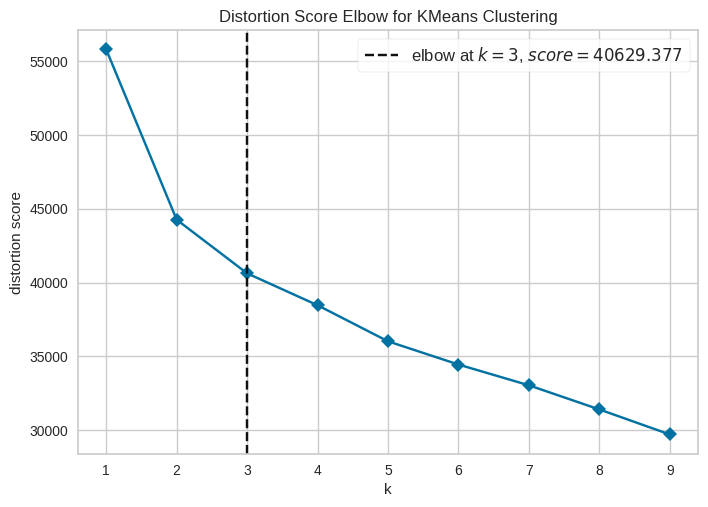

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=18), k=(1, 10),
                 timings=False)

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=18),
                  pca_df,
                  k=(1, 10),
                  timings=False)

Therefore we choose k=3 in clustering.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

pca_df['Cluster'] = cluster_labels
concat_df['Cluster_Customer'] = cluster_labels
concat_df2['Cluster_Customer'] = cluster_labels
df['Cluster_Customer'] = cluster_labels

In [ ]:
#df.to_excel('clustered.xlsx', index=False)

In [ ]:
cluster0 = df[df['Cluster_Customer'] == 0]
cluster1 = df[df['Cluster_Customer'] == 1]
cluster2 = df[df['Cluster_Customer'] == 2]

visualization of clustering analysis

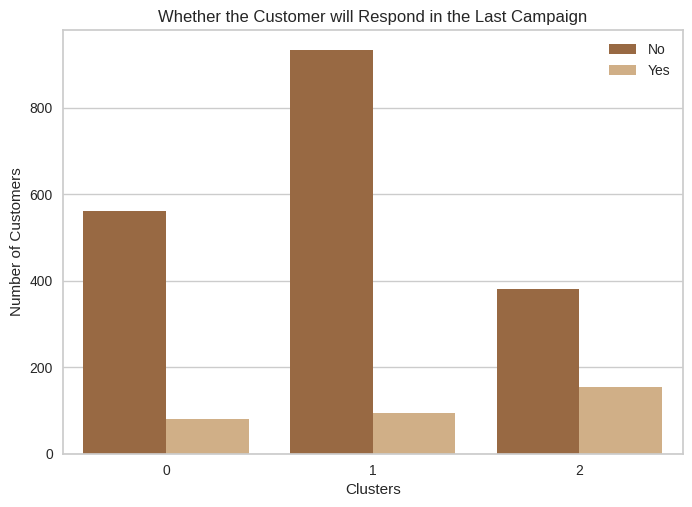

In [ ]:
#Plotting whether the customer will respond in the last campaign
plt.figure()
pl = sns.countplot(x=concat_df['Cluster_Customer'],hue=concat_df["Response"], palette= ["#A66735","#dcb07b"])
pl.set_title("Whether the Customer will Respond in the Last Campaign")
pl.set_xlabel("Clusters")
pl.set_ylabel("Number of Customers")
legend = plt.legend()
for t, label in zip(legend.texts, ['No', 'Yes']):
    t.set_text(label)
plt.show()

demographic data analysis

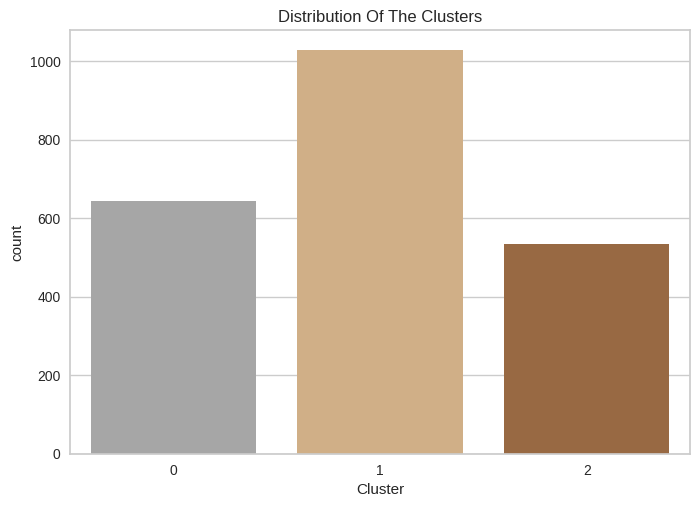

In [ ]:
#number of each cluster
pal = ["#a6a6a6", "#dcb07b", "#A66735", "#c59a94", "#F7ead0", "#FFDAB9"]
pl = sns.countplot(x=pca_df["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

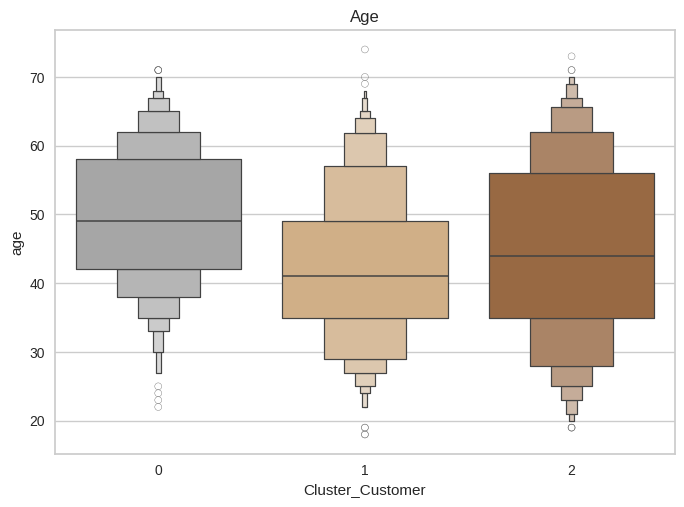

In [ ]:
#Plotting the age
plt.figure()
pl=sns.boxenplot(y=concat_df["age"],x=concat_df['Cluster_Customer'], palette= pal)
pl.set_title("Age")
plt.show()

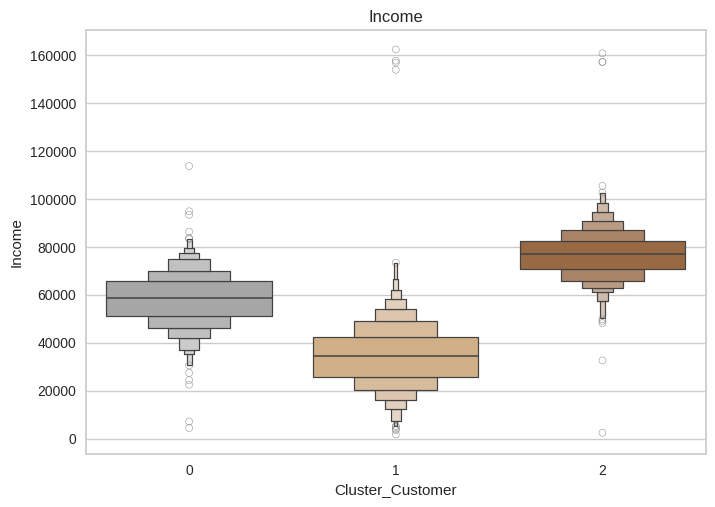

In [ ]:
#Plotting the income
plt.figure()
pl=sns.boxenplot(y=concat_df["Income"],x=concat_df['Cluster_Customer'], palette= pal)
pl.set_title("Income")
plt.show()

In [ ]:
#Summarize the data of Kidhome and Teenhome

# Function to count the occurrences of each value in a DataFrame column
def count_values(df, column_name):
    return df[column_name].value_counts()

# Assuming you have cluster0, cluster1, and cluster2 DataFrames already defined

clusters = [cluster0, cluster1, cluster2]

for i, cluster in enumerate(clusters):
    kidhome_avg = round(cluster['Kidhome'].mean(), 2)
    teenhome_avg = round(cluster['Teenhome'].mean(), 2)

    print(f"Cluster {i}:")
    print(f"  Kidhome - Average: {kidhome_avg}, Count: {kidhome_count}")
    print(f"  Teenhome - Average: {teenhome_avg}, Count: {teenhome_count}")
    print(f"  Value Counts:")
    print("  Kidhome:")
    print(count_values(cluster, 'Kidhome'))
    print("  Teenhome:")
    print(count_values(cluster, 'Teenhome'))


Cluster 0:


NameError: name 'kidhome_count' is not defined

In [ ]:
#Plotting education level of customers in each cluster
plt.figure()
pl = sns.countplot(x=concat_df['Cluster_Customer'],hue=concat_df["Education"], palette= pal)
pl.set_title("Education Level of Customers")
pl.set_xlabel("Clusters")
pl.set_ylabel("Number of Customers")
plt.show()

In [ ]:
#Plotting marital status of customers in each cluster
plt.figure()
pl = sns.countplot(x=concat_df['Cluster_Customer'],hue=concat_df["Marital_Status"], palette= pal)
pl.set_title("Marital Status of Customers")
pl.set_xlabel("Clusters")
pl.set_ylabel("Number of Customers")
plt.show()

Customer purchasing habit and preference

In [ ]:
#Plotting the number of days since the customer's last purchase
plt.figure()
pl=sns.boxenplot(y=concat_df["Recency"],x=concat_df['Cluster_Customer'], palette= pal)
pl.set_title("Number of Days since Customer's Last Purchase")
pl.set_xlabel("Clusters")
plt.show()

In [ ]:
#Plotting whether the customer complained in the last 2 years
plt.figure()
pl = sns.countplot(x=concat_df['Cluster_Customer'],hue=concat_df["Complain"], palette= ["#A66735","#dcb07b"])
pl.set_title("Whether the Customer Complained in the Last 2 Years")
pl.set_xlabel("Clusters")
pl.set_ylabel("Number of Customers")
legend = plt.legend()
for t, label in zip(legend.texts, ['No', 'Yes']):
    t.set_text(label)
plt.show()

In [ ]:
#accepted campaign history
def plot_binary_columns(df, cluster_name):
    binary_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
    fig, axes = plt.subplots(nrows=1, ncols=len(binary_columns), figsize=(15, 4))
    fig.suptitle(f"Binary Column Distribution in {cluster_name}")

    for i, column in enumerate(binary_columns):
        counts = df[column].value_counts()
        counts.plot(kind='bar', ax=axes[i], color=['skyblue', 'orange'])
        axes[i].set_title(column)
        axes[i].set_xlabel("Response")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

# Assuming you have cluster0, cluster1, or cluster2 already defined
clusters = [cluster0, cluster1, cluster2]
for i, cluster in enumerate(clusters):
    cluster_name = f"Cluster {i}"
    plot_binary_columns(cluster, cluster_name)

In [ ]:
#Plotting number of visits to company’s website in the last month
plt.figure()
pl=sns.boxenplot(y=concat_df["NumWebVisitsMonth"],x=concat_df['Cluster_Customer'], palette= pal)
pl.set_title("Number of Visits to Company's Website in the Last Month")
pl.set_xlabel("Clusters")
pl.set_ylabel("Number of Website Visits")
plt.show()

In [ ]:
df3 = concat_df.copy()
cluster_means = df3.groupby('Cluster_Customer')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

cluster_means_melted = pd.melt(cluster_means, id_vars='Cluster_Customer', var_name='PurchaseType', value_name='AveragePurchases')

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster_Customer', y='AveragePurchases', hue='PurchaseType', data=cluster_means_melted, palette= pal)

plt.title('Purchasing Channel')
plt.xlabel('Clusters')
plt.ylabel('Average Purchases')

legend = plt.legend()
for t, label in zip(legend.texts, ['Website', 'Catalog', 'Store']):
    t.set_text(label)

plt.show()

In [ ]:
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
clusters = [cluster0, cluster1, cluster2]
scaler = StandardScaler()
i = 0
for cluster in clusters:
  # max_product = cluster[products].max().idxmax()
  avg = {}
  cluster_copy = cluster.copy()
  cluster_copy[products] = scaler.fit_transform(cluster_copy[products])
  for product in products:
    avg_product = cluster_copy[product].mean()
    avg[product] = avg_product
  max_product = max(avg.values())
  print(f"Cluster {i} :")
  print(avg)
  print("Max product for this cluster is:", max_product)
  i = i + 1
# cluster0['max_product'].describe() #Gold
# cluster1['max_product'].describe() #Meat
# cluster2['max_product'].describe() #Fruits
# cluster3['max_product'].describe() #Fruits
# cluster4['max_product'].describe() #Fruits

# Object 2: Product Purchase Prediction

In [ ]:
df2 = concat_df.copy()
df3 = concat_df.copy()
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Days_Since_Enrollment,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,848,False,True,False,False,False,True,False,False,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,298,False,True,False,False,False,True,False,False,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,497,False,True,False,False,False,False,True,False,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,324,False,True,False,False,False,False,True,False,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,346,False,False,False,True,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,566,False,True,False,False,True,False,False,False,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,204,False,False,False,True,False,False,True,False,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,340,False,True,False,False,False,False,False,False,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,341,False,False,True,False,False,False,True,False,0


In [ ]:
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']
percentiles = df[products].quantile([0, 0.25, 0.5, 0.75, 1])
def map_percentile(value, percentiles):
    if value <= percentiles.iloc[0]:
        return 0
    elif value <= percentiles.iloc[1]:
        return 1
    elif value <= percentiles.iloc[2]:
        return 2
    elif value <= percentiles.iloc[3]:
        return 3
    else:
        return 4

for column in products:
  name = column + '_per'
  df2[name] = df2[column].apply(lambda x: map_percentile(x, percentiles[column]))

for column in products:
    name = column + '_per'
    df2[name] = df2[column].apply(lambda x: map_percentile(x, percentiles[column]))
    class_distribution = df2[name].value_counts().sort_index()
    print(class_distribution)

MntWines_per
0     13
1    547
2    543
3    551
4    551
Name: count, dtype: int64
MntFruits_per
0    393
1    277
2    451
3    542
4    542
Name: count, dtype: int64
MntMeatProducts_per
0      1
1    580
2    528
3    545
4    551
Name: count, dtype: int64
MntFishProducts_per
0    378
1    290
2    453
3    542
4    542
Name: count, dtype: int64
MntSweetProducts_per
0    411
1    160
2    540
3    543
4    551
Name: count, dtype: int64
MntGoldProds_per
0     61
1    522
2    521
3    552
4    549
Name: count, dtype: int64


In [ ]:
features = ['age','Income','Kidhome','Teenhome','Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumDealsPurchases','NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
       'MntWines_per', 'MntFruits_per','MntMeatProducts_per', 'MntFishProducts_per', 'MntSweetProducts_per', 'MntGoldProds_per','Days_Since_Enrollment']
target =['Response']
# features = ['age','Income','Kidhome','Teenhome','Education_Basic', 'Education_Graduation', 'Education_Master',
#        'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
#        'Marital_Status_Together', 'Marital_Status_Widow','NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumDealsPurchases','NumWebVisitsMonth',
#        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
#        'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Days_Since_Enrollment']

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

X = df2[features]
y = df2[target].values.ravel()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)


    model = sm.Logit(y_train, X_train_const)
    result = model.fit(disp=0)

    print(f"Summary for fold {train_index}:")
    print(result.summary())
    print("\n")

    y_pred_prob = result.predict(X_test_const)
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracies per fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))
print("Confusion Matrix of the last fold:")
print(confusion_matrices[-1])


Summary for fold [   0    1    2 ... 2202 2203 2204]:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1764
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                           31
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                  0.4367
Time:                        08:32:58   Log-Likelihood:                -418.50
converged:                       True   LL-Null:                       -742.88
Covariance Type:            nonrobust   LLR p-value:                1.069e-116
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.9756      0.143    -20.841      0.000      -3.255      -2.696
age                         0.1488    

In [ ]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)

results = {
    'l1': {'Accuracies': [], 'Confusion Matrices': [], 'Classification Reports': []},
    'l2': {'Accuracies': [], 'Confusion Matrices': [], 'Classification Reports': []}
}

for penalty in ['l1', 'l2']:
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LogisticRegression(penalty=penalty, C=1.0, solver='saga', max_iter=1000)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[penalty]['Accuracies'].append(accuracy)
        results[penalty]['Confusion Matrices'].append(cm)
        results[penalty]['Classification Reports'].append(report)

for penalty in results:
    print(f"Results for {penalty} penalty:")
    avg_accuracy = np.mean(results[penalty]['Accuracies'])
    print(f"Average Accuracy: {avg_accuracy}")
    print("Confusion Matrices for each fold:", results[penalty]['Confusion Matrices'])
    for report in results[penalty]['Classification Reports']:
        print("Classification Report:", report)
    print()
avg_accuracies = {
    'l1': np.mean(results['l1']['Accuracies']),
    'l2': np.mean(results['l2']['Accuracies'])
}

best_penalty = 'l1' if avg_accuracies['l1'] > avg_accuracies['l2'] else 'l2'
best_avg_accuracy = avg_accuracies[best_penalty]

print(f"The best model uses the {best_penalty} penalty with an average accuracy of {best_avg_accuracy:.2f}.")
confusion_matrices = results[best_penalty]['Confusion Matrices']
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print("Average Confusion Matrix for the best model:")
print(average_confusion_matrix)

classification_reports = results[best_penalty]['Classification Reports']
f1_scores = [report['macro avg']['f1-score'] for report in classification_reports]
avg_f1_score = np.mean(f1_scores)
print(f"Average F1 Score (macro average) for the best model: {avg_f1_score:.2f}")


Results for l1 penalty:
Average Accuracy: 0.888888888888889
Confusion Matrices for each fold: [array([[351,  23],
       [ 36,  31]]), array([[358,  15],
       [ 35,  33]]), array([[380,   5],
       [ 35,  21]]), array([[362,   7],
       [ 41,  31]]), array([[355,  19],
       [ 29,  38]])]
Classification Report: {'0': {'precision': 0.9069767441860465, 'recall': 0.9385026737967914, 'f1-score': 0.9224704336399474, 'support': 374}, '1': {'precision': 0.5740740740740741, 'recall': 0.4626865671641791, 'f1-score': 0.512396694214876, 'support': 67}, 'accuracy': 0.8662131519274376, 'macro avg': {'precision': 0.7405254091300603, 'recall': 0.7005946204804853, 'f1-score': 0.7174335639274116, 'support': 441}, 'weighted avg': {'precision': 0.8563996945318464, 'recall': 0.8662131519274376, 'f1-score': 0.8601689811649366, 'support': 441}}
Classification Report: {'0': {'precision': 0.910941475826972, 'recall': 0.9597855227882037, 'f1-score': 0.9347258485639687, 'support': 373}, '1': {'precision': 

In [ ]:

for feature in features:
    df3[feature] = np.log1p(df2[feature])
X = df3[features]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train.values.ravel())

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.873015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       374
           1       0.60      0.48      0.53        67

    accuracy                           0.87       441
   macro avg       0.76      0.71      0.73       441
weighted avg       0.86      0.87      0.87       441



In [ ]:


features = ['age','Income','Kidhome','Teenhome','Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumDealsPurchases','NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
       'MntWines_per', 'MntFruits_per','MntMeatProducts_per', 'MntFishProducts_per', 'MntSweetProducts_per', 'MntGoldProds_per','Days_Since_Enrollment']
target =['Response']
# features = ['age','Income','Kidhome','Teenhome','Education_Basic', 'Education_Graduation', 'Education_Master',
#        'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
#        'Marital_Status_Together', 'Marital_Status_Widow','NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumDealsPurchases','NumWebVisitsMonth',
#        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
#        'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Days_Since_Enrollment']


X = df2[features]
y = df2[target].values.ravel()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

results = {'Accuracies': [], 'Confusion Matrices': []}

for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracies = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results['Accuracies'].append(accuracies)
    results['Confusion Matrices'].append(cm)

print(f"Average Accuracy: {np.mean(results['Accuracies'])}")
print("Confusion Matrices for each fold:", results['Confusion Matrices'])


Average Accuracy: 0.834920634920635
Confusion Matrices for each fold: [array([[336,  38],
       [ 39,  28]]), array([[333,  40],
       [ 28,  40]]), array([[348,  37],
       [ 32,  24]]), array([[337,  32],
       [ 45,  27]]), array([[326,  48],
       [ 25,  42]])]


In [ ]:
from sklearn.model_selection import GridSearchCV

X = df2[features]
y = df2[target].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_

importances = best_dt.feature_importances_

print("Feature importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")


y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))


print("Feature importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8645103656966263
Feature importances:
age: 0.000
Income: 0.027
Kidhome: 0.000
Teenhome: 0.000
Education_Basic: 0.000
Education_Graduation: 0.007
Education_Master: 0.000
Education_PhD: 0.000
Marital_Status_Married: 0.025
Marital_Status_Single: 0.000
Marital_Status_Together: 0.038
Marital_Status_Widow: 0.000
NumWebPurchases: 0.000
NumCatalogPurchases: 0.035
NumStorePurchases: 0.021
Recency: 0.074
NumDealsPurchases: 0.002
NumWebVisitsMonth: 0.049
AcceptedCmp1: 0.000
AcceptedCmp2: 0.000
AcceptedCmp3: 0.217
AcceptedCmp4: 0.000
AcceptedCmp5: 0.328
Complain: 0.000
MntWines_per: 0.000
MntFruits_per: 0.017
MntMeatProducts_per: 0.056
MntFishProducts_per: 0.000
MntSweetProducts_per: 0.000
MntGoldProds_per: 0.031
Days_Since_Enrollment: 0.075
Accuracy on Test Set: 0.866213151

In [ ]:
X = df2[features]
y = df2['Cluster_Customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_

importances = best_dt.feature_importances_

print("Feature importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")

y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))


print("Feature importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.9013681431882565
Feature importances:
age: 0.017
Income: 0.040
Kidhome: 0.004
Teenhome: 0.046
Education_Basic: 0.000
Education_Graduation: 0.001
Education_Master: 0.001
Education_PhD: 0.003
Marital_Status_Married: 0.000
Marital_Status_Single: 0.000
Marital_Status_Together: 0.000
Marital_Status_Widow: 0.000
NumWebPurchases: 0.276
NumCatalogPurchases: 0.017
NumStorePurchases: 0.072
Recency: 0.004
NumDealsPurchases: 0.045
NumWebVisitsMonth: 0.240
AcceptedCmp1: 0.001
AcceptedCmp2: 0.000
AcceptedCmp3: 0.001
AcceptedCmp4: 0.000
AcceptedCmp5: 0.005
Complain: 0.000
MntWines_per: 0.049
MntFruits_per: 0.043
MntMeatProducts_per: 0.087
MntFishProducts_per: 0.009
MntSweetProducts_per: 0.023
MntGoldProds_per: 0.009
Days_Since_Enrollment: 0.006
Accuracy on Test Set: 0.9024

In [ ]:
tree = best_dt.tree_

# Define a function to print the information of nodes (feature and threshold)
def print_split(node, depth=0):
    if tree.feature[node] != -2:  # If not a leaf node
        # Get the feature name from the index
        name = features[tree.feature[node]]
        threshold = tree.threshold[node]
        print(f"{depth * '  '}Node: {node}, depth: {depth}, split: {name} <= {threshold:.3f}")

        # Recursively go to the left and right child
        left_child = tree.children_left[node]
        right_child = tree.children_right[node]

        print_split(left_child, depth + 1)
        print_split(right_child, depth + 1)
    else:
        # It's a leaf node
        print(f"{depth * '  '}Leaf node: {node}, depth: {depth}")

# Print the splits starting from the root node
print_split(0)


Node: 0, depth: 0, split: NumWebVisitsMonth <= 3.500
  Node: 1, depth: 1, split: MntMeatProducts_per <= 3.500
    Node: 2, depth: 2, split: MntSweetProducts_per <= 3.500
      Node: 3, depth: 3, split: Income <= 57743.500
        Node: 4, depth: 4, split: MntFishProducts_per <= 2.500
          Node: 5, depth: 5, split: MntMeatProducts_per <= 2.500
            Node: 6, depth: 6, split: Teenhome <= 1.500
              Leaf node: 7, depth: 7
              Leaf node: 8, depth: 7
            Leaf node: 9, depth: 6
          Node: 10, depth: 5, split: NumDealsPurchases <= 1.500
            Leaf node: 11, depth: 6
            Node: 12, depth: 6, split: age <= 32.500
              Leaf node: 13, depth: 7
              Node: 14, depth: 7, split: age <= 53.500
                Leaf node: 15, depth: 8
                Leaf node: 16, depth: 8
        Node: 17, depth: 4, split: Teenhome <= 0.500
          Node: 18, depth: 5, split: MntWines_per <= 3.500
            Node: 19, depth: 6, split: NumStore